Diego Isaac Rodriguez Monsivaiz 1951669
A4: Entrenar red neuronal artificial simple N1

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
from keras.datasets import mnist

In [3]:
(entren_imagenes, entren_etiquetas), (test_imagenes, test_etiquetas) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
entren_imagenes.shape

(60000, 28, 28)

In [5]:
len(entren_imagenes)

60000

In [6]:
entren_imagenes.dtype

dtype('uint8')

In [7]:
test_imagenes.shape 

(10000, 28, 28)

In [8]:
len(test_imagenes)

10000

In [9]:
test_imagenes.dtype

dtype('uint8')

In [10]:
len(test_etiquetas)

10000

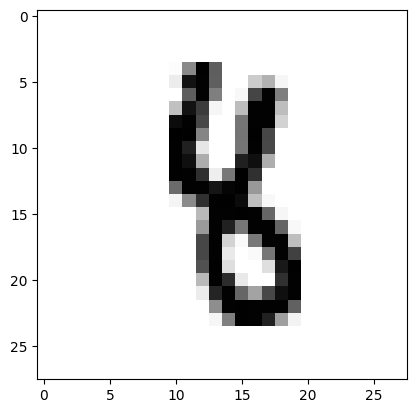

In [11]:
plt.imshow(entren_imagenes[7000], cmap=plt.cm.binary)

In [12]:
print(entren_etiquetas[7000])

8


In [14]:
entren_imagenes=entren_imagenes / 255.0 
test_imagenes=test_imagenes / 255.0

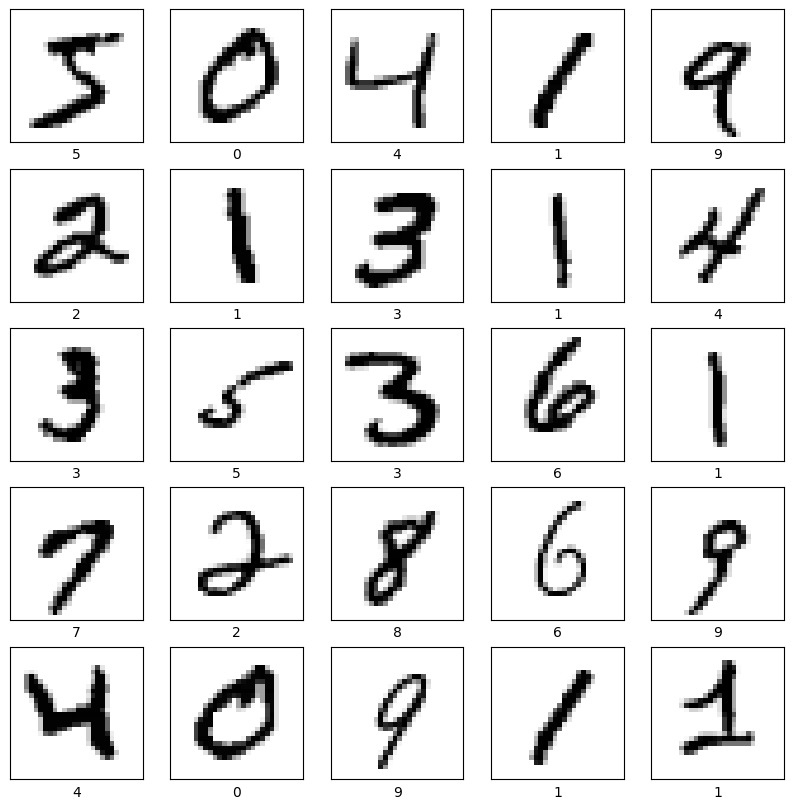

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(entren_imagenes[i], cmap=plt.cm.binary)
    plt.xlabel(entren_etiquetas[i])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(entren_imagenes, entren_etiquetas, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1559 - accuracy: 0.7283
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4767 - accuracy: 0.8762
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3772 - accuracy: 0.8964
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3385 - accuracy: 0.9048
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3163 - accuracy: 0.9100
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3016 - accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2898 - accuracy: 0.9169
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2800 - accuracy: 0.9193
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.9219
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.262

In [19]:
test_loss, test_acc = model.evaluate(test_imagenes,  test_etiquetas, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2570 - accuracy: 0.9255 - 693ms/epoch - 2ms/step

Test accuracy: 0.9254999756813049


In [20]:
predictions = model.predict(test_imagenes)

313/313 [==============================] - 1s 2ms/step


In [21]:
predictions[0]

array([4.3034917e-05, 8.2912655e-09, 9.3481620e-05, 1.3689022e-03,
       8.6574499e-07, 4.3676326e-05, 4.6843529e-10, 9.9796259e-01,
       8.5697484e-06, 4.7869066e-04], dtype=float32)

In [22]:
np.argmax(predictions[0])

7

In [23]:
test_etiquetas[0]

7

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                               [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

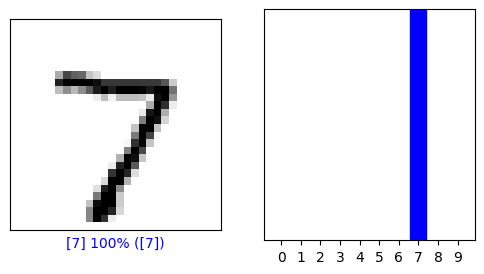

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_etiquetas, test_imagenes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_etiquetas)
plt.show()

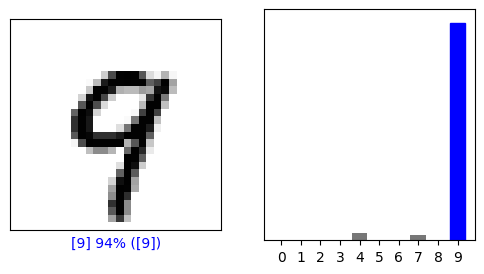

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_etiquetas, test_imagenes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_etiquetas)
plt.show()

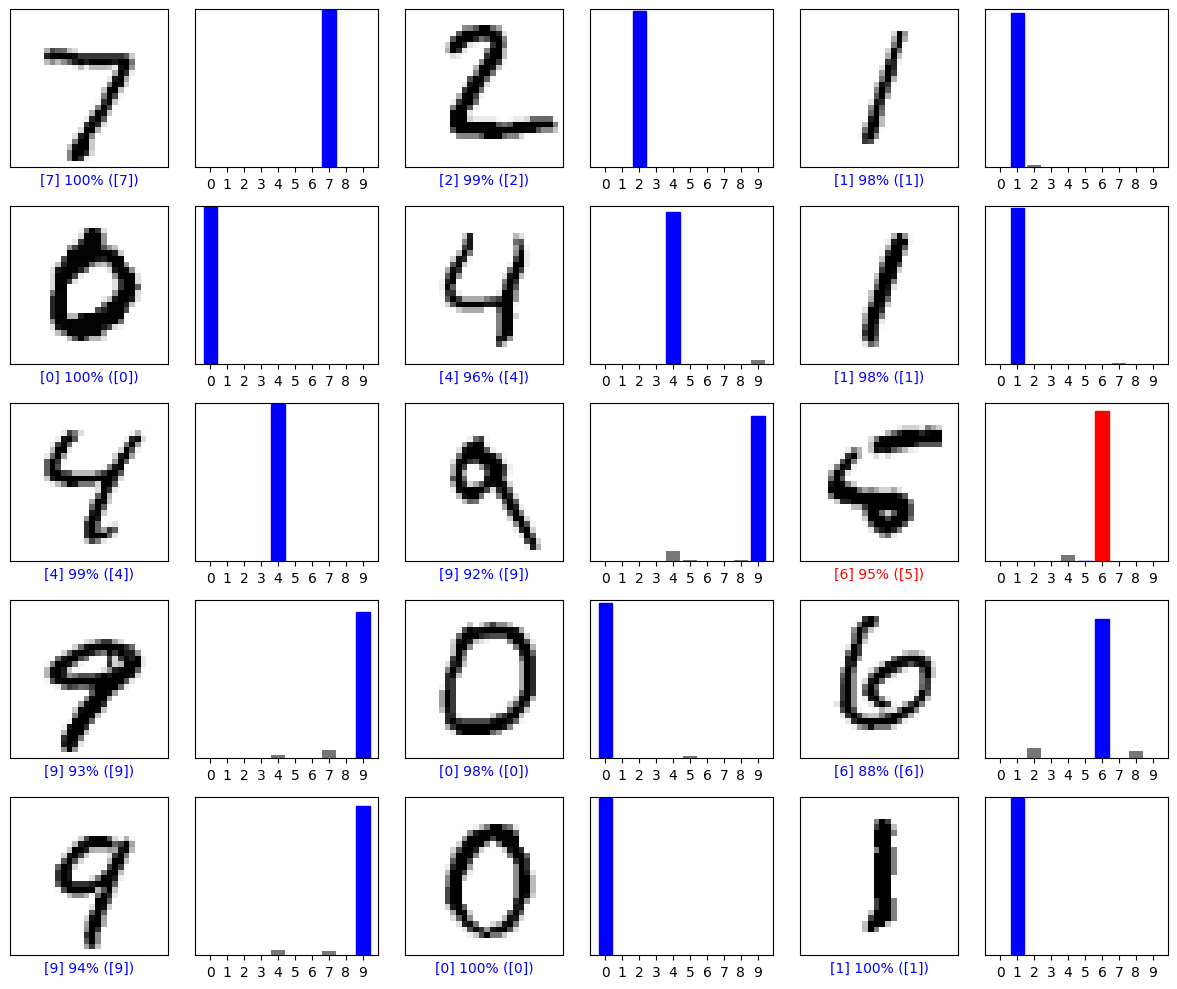

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_etiquetas, test_imagenes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_etiquetas)
plt.tight_layout()
plt.show()

In [29]:
img = test_imagenes[1]
print(img.shape)

(28, 28)


In [30]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 141ms/step
[[2.43253005e-03 3.09854590e-06 9.88884449e-01 3.65276774e-03
  5.21257898e-11 2.75373901e-03 1.79802300e-03 1.40840811e-11
  4.75464127e-04 1.12712145e-10]]


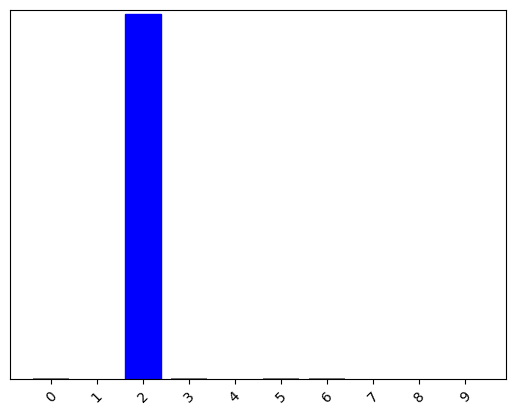

In [32]:
plot_value_array(1, predictions_single[0], test_etiquetas)
_ = plt.xticks(range(10), rotation=45)

In [33]:
np.argmax(predictions_single[0])  

2